In [1]:
# Importing Basic Modules

import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

# Importing Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


In [2]:
#importing dataset

df = pd.read_csv('Final Bank customers data.csv')
df.drop('TOTAL TIME', axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52499 entries, 0 to 52498
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bank          52499 non-null  int64 
 1   Week          52499 non-null  int64 
 2   Day           52499 non-null  int64 
 3   Number        52499 non-null  int64 
 4   ARRIVAL TIME  52499 non-null  object
 5   SERVICE TIME  52499 non-null  int64 
 6   WAITING TIME  52499 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.8+ MB


In [3]:
df.describe()

,Bank,Week,Day,Number,SERVICE TIME,WAITING TIME
count,52499.000000,52499.000000,52499.000000,52499.000000,52499.000000,52499.000000
mean,1.989200,2.522639,2.956628,447.596469,13.549344,13.182384
std,0.816569,1.122348,1.409736,267.258658,5.906840,5.955687
min,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000
25%,1.000000,2.000000,2.000000,219.000000,9.000000,9.000000
50%,2.000000,3.000000,3.000000,438.000000,13.000000,12.000000
75%,3.000000,4.000000,4.000000,663.000000,17.000000,16.000000
max,3.000000,4.000000,5.000000,1057.000000,36.000000,35.000000


In [4]:
print(df.groupby(by=['Bank']).count().Number)

print()
print()

print(df.groupby(by=['Bank','Week']).count().Number)

print()
print()

#print(df.groupby(by=['Bank','Week','Day']).count().Number)

Bank
1    17789
2    17488
3    17222
Name: Number, dtype: int64


Bank  Week
1     1       3944
      2       4031
      3       5024
      4       4790
2     1       4666
      2       4198
      3       3858
      4       4766
3     1       4286
      2       4660
      3       4212
      4       4064
Name: Number, dtype: int64


Bank  Week  Day
1     1     1       880
            2       720
            3      1020
            4       802
            5       522
      2     1       989
            2       684
            3       548
            4      1021
            5       789
      3     1      1000
            2       990
            3      1001
            4      1051
            5       982
      4     1       857
            2       981
            3      1057
            4       899
            5       996
2     1     1      1034
            2       789
            3      1002
            4       910
            5       931
      2     1       748
            2       924
 

In [5]:
df_art = np.array(df['ARRIVAL TIME'])

x = []

for i in range(len(df_art)):
    
    if type(df_art[i]) == str :
        p = df_art[i].split(':')
        x.append(float(p[0]+'.'+p[1]))
        
    else:
        x.append(df_art[i])


df['ARRIVAL TIME'] = x

In [6]:
dep = 'WAITING TIME'

ind = df.columns.to_list()

ind.remove(dep)



x = df[ind].values
y = df[dep].values

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [8]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

## Linear Regression

In [9]:
lin_reg = LinearRegression()

In [10]:
ts1 = time.time()
lin_reg.fit(x_train_std,y_train)
ts2 = time.time()
lin_reg_time = (ts2-ts1)
print(ts2-ts1)

0.7071936130523682


In [11]:
lin_reg.score(x_test_std,y_test)

0.11060472560314139

In [12]:
math.sqrt(mean_squared_error(y_test,lin_reg.predict(x_test_std)))

5.566185461253065

In [13]:
mean_absolute_error(y_test,lin_reg.predict(x_test_std))

4.25726315916412

## K Nearest Neighbour

In [14]:
knn = KNeighborsClassifier(n_neighbors = 10,metric='minkowski')

In [15]:
ts1 = time.time()
knn.fit(x_train_std,y_train)
ts2 = time.time()
knn_time = (ts2-ts1)

In [16]:
knn.score(x_test_std,y_test)

0.2243047619047619

In [17]:
mean_squared_error(y_test,knn.predict(x_test_std))

5.538133333333334

In [18]:
mean_absolute_error(y_test,knn.predict(x_test_std))

1.7677714285714285

## Random Forest

In [19]:
rf = RandomForestRegressor(random_state = 1, n_jobs=-1)

In [20]:
ts1 = time.time()
rf.fit(x_train_std,y_train)
ts2 = time.time()
rf_time = (ts2-ts1)

In [21]:
rf.score(x_test_std,y_test)

0.8916139741286413

In [22]:
mean_squared_error(y_test,rf.predict(x_test_std))

3.775668182857143

In [23]:
mean_absolute_error(y_test,rf.predict(x_test_std))

1.5174377142857143

## SVR

In [24]:
svr = SVR(kernel='rbf')

In [25]:
ts1 = time.time()
svr.fit(x_train_std,y_train)
ts2 = time.time()
svr_time = (ts2-ts1)

In [26]:
svr.score(x_test_std,y_test)

0.738577759836459

In [27]:
mean_squared_error(y_test,svr.predict(x_test_std))

9.106742557829579

In [28]:
mean_absolute_error(y_test,svr.predict(x_test_std))

2.271875037614469

## Extra Tree Regression

In [29]:
etr = ExtraTreesRegressor(n_jobs=-1)

In [30]:
ts1 = time.time()
etr.fit(x_train_std,y_train)
ts2 = time.time()
et_time = (ts2-ts1)

In [31]:
etr.score(x_test_std,y_test)

0.8704682935821472

In [32]:
mean_squared_error(y_test,etr.predict(x_test_std))

4.512285958095238

In [33]:
mean_absolute_error(y_test,etr.predict(x_test_std))

1.6342796190476192

## Ridge Regression

In [34]:
ridge = Ridge()

In [35]:
ts1 = time.time()
ridge.fit(x_train_std,y_train)
ts2 = time.time()
rr_time = (ts2-ts1)

In [36]:
ridge.score(x_test_std,y_test)

0.11060417778946208

In [37]:
mean_squared_error(y_test,ridge.predict(x_test_std))

30.982439672361604

In [38]:
mean_absolute_error(y_test,ridge.predict(x_test_std))

4.257281887791571

## r2 Score, RMSE and MAE for all algorithms

In [39]:
lr_acc_score = lin_reg.score(x_test_std,y_test)
lr_rmse = math.sqrt(mean_squared_error(y_test,lin_reg.predict(x_test_std)))
lr_mae = mean_absolute_error(y_test,lin_reg.predict(x_test_std))


knn_acc_score = knn.score(x_test_std,y_test)
knn_rmse = math.sqrt(mean_squared_error(y_test,knn.predict(x_test_std)))
knn_mae = mean_absolute_error(y_test,knn.predict(x_test_std))


rf_acc_score = rf.score(x_test_std,y_test)
rf_rmse = math.sqrt(mean_squared_error(y_test,rf.predict(x_test_std)))
rf_mae = mean_absolute_error(y_test,rf.predict(x_test_std))


svr_acc_score = svr.score(x_test_std,y_test)
svr_rmse = math.sqrt(mean_squared_error(y_test,svr.predict(x_test_std)))
svr_mae = mean_absolute_error(y_test,svr.predict(x_test_std))


etr_acc_score = etr.score(x_test_std,y_test)
etr_rmse = math.sqrt(mean_squared_error(y_test,etr.predict(x_test_std)))
etr_mae = mean_absolute_error(y_test,etr.predict(x_test_std))


ridge_acc_score = ridge.score(x_test_std,y_test)
ridge_rmse = math.sqrt(mean_squared_error(y_test,ridge.predict(x_test_std)))
ridge_mae = mean_absolute_error(y_test,ridge.predict(x_test_std))

In [40]:
algo_scores = [['Linear Regression',lr_acc_score,lr_rmse,lr_mae,lin_reg_time],
              ['K Nearest Neighbour',knn_acc_score,knn_rmse,knn_mae,knn_time],
              ['Random Forest   ',rf_acc_score,rf_rmse,rf_mae,rf_time],
              ['SVR               ',svr_acc_score,svr_rmse,svr_mae,svr_time],
              ['Extra Tree Regression',etr_acc_score,etr_rmse,etr_mae,et_time],
              ['Ridge Regression',ridge_acc_score,ridge_rmse,ridge_mae,rr_time],
              ]

In [41]:
print('    Algorithm              Accuracy Score                  RMSE                      MAE             Time')
print('---------------------------------------------------------------------------------------------------------------')
for i in algo_scores:
    
    for a in i:
        
        print(a,end='\t')
    print()
    print()

    Algorithm              Accuracy Score                  RMSE                      MAE             Time
---------------------------------------------------------------------------------------------------------------
Linear Regression	0.11060472560314139	5.566185461253065	4.25726315916412	0.7071936130523682	

K Nearest Neighbour	0.2243047619047619	2.3533238904437557	1.7677714285714285	0.2052292823791504	

Random Forest   	0.8916139741286413	1.9431078670154014	1.5174377142857143	5.868594646453857	

SVR               	0.738577759836459	3.0177379869414738	2.271875037614469	112.11304211616516	

Extra Tree Regression	0.8704682935821472	2.124214197790618	1.6342796190476192	5.150033473968506	

Ridge Regression	0.11060417778946208	5.566187175469542	4.257281887791571	0.4894130229949951	



## Plotting of scores and Algorithms

In [42]:
rmse_scores = [5.576562592880742,2.366077726855948,1.9500983633311082,2.9929448367336007,2.1296861239785234,
               5.57655595507925]

acc_scores = [0.10833751735976205,0.22651428571428572,0.890961374834455,0.7431587610893757,0.8699535402687686,
              0.10833964005629282]

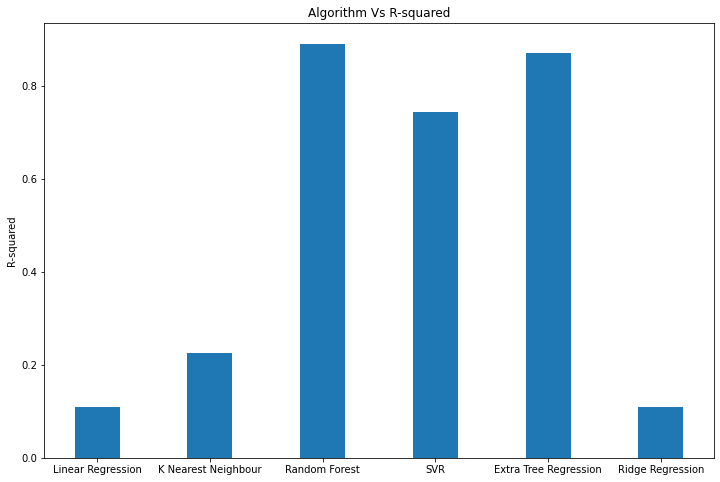

In [43]:
x_labels = ['Linear Regression','K Nearest Neighbour','Random Forest','SVR','Extra Tree Regression','Ridge Regression'] 
plt.figure(figsize=(12,8))
plt.bar(x_labels,acc_scores,width=0.4)
plt.ylabel('R-squared')
plt.title('Algorithm Vs R-squared')
plt.show()

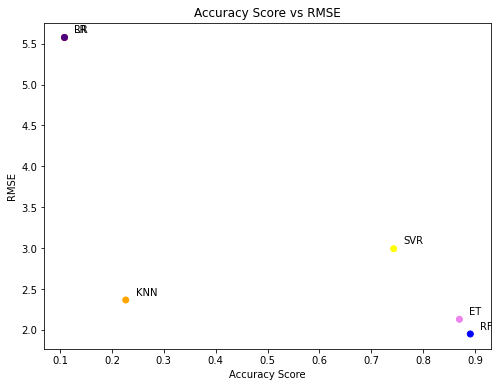

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(acc_scores,rmse_scores,c=['red','orange','blue','yellow','violet','indigo'])
plt.xlabel('Accuracy Score')
plt.ylabel("RMSE")
titles = ['LR','KNN','RF','SVR','ET','RR']
for i,label in enumerate(titles):
    plt.annotate(label,(acc_scores[i],rmse_scores[i]),xytext=(10, 5), textcoords="offset pixels")
plt.title('Accuracy Score vs RMSE')
plt.show()

### Predicting the real time waiting time of user

In [45]:
bank = int(input('What bank you are in - 1 or 2 or 3 ?  '))

print()
week = int(input('What is the week - 1 or 2 or 3 or 4 ?  '))

print()
print('Monday -1')
print('tuesday -2')
print('Wednesday -3')
print('Thursday -4')
print('Friday -5')
print()

day = int(input('from above data, what day is it - 1 or 2 or 3 or 4 or 5 ?  '))

print()
num = int(input('what is your current queue length ?  '))

print()
art = float(input('what is the arrival time(hh.mm) ?  '))

print()
print('1 - Account Opening/Closing')
print('2 - cheque withdrawal/money deposit/money withdrawal')
print('3 - Gold related/fields related/others')
print()

se = int(input('From the above options, for which service/option you came?  '))

if se == 1:
    servt = 20
elif se == 2:
    servt = 15
else:
    servt = 30


in_nstd = np.array([bank,week,day,num,art,servt])

wait = rf.predict([in_nstd])

print()



print(f'Expected waiting time for you is : {wait[0]}')






What bank you are in - 1 or 2 or 3 ?  2

What is the week - 1 or 2 or 3 or 4 ?  4

Monday -1
tuesday -2
Wednesday -3
Thursday -4
Friday -5

from above data, what day is it - 1 or 2 or 3 or 4 or 5 ?  3

what is your current queue length ?  12

what is the arrival time(hh.mm) ?  09.00

1 - Account Opening/Closing
2 - cheque withdrawal/money deposit/money withdrawal
3 - Gold related/fields related/others

From the above options, for which service/option you came?  2

Expected waiting time for you is : 10.44
